# Predicting Dengue Cases in Kerala using RNN

In [1]:
#Importing the necessary packages

import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE


# Reading The datafile containing the dengue case count along with along other weather features

In [4]:
pwd = os.getcwd()
filepath = os.path.join(pwd,r"DATA/try_data.csv")
filepath

'/Users/nalinrajendran/Desktop/STUDY/MIS  SIP PAPER/OUR CODE/COMMENTED/DATA/try_data.csv'

In [5]:
df = pd.read_csv(filepath)
df
# In the months columns we have assigned numbers from 1 to 12 respectively for the months from January To December 
#The table includes precipitation,humidity,temperature parameters

,state,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,Kerala,2011,1,68,23.47,72.81,0.04,0.00,13.18,32.30,16.42,24.360,17.61
1,Kerala,2011,2,41,24.90,65.56,1.58,47.46,12.63,33.97,16.10,25.035,16.65
2,Kerala,2011,3,54,27.33,61.00,0.44,10.55,13.37,36.56,18.12,27.340,17.42
3,Kerala,2011,4,53,27.20,72.94,4.01,105.47,16.42,36.91,22.50,29.705,21.04
4,Kerala,2011,5,84,26.72,79.38,4.33,121.29,17.70,34.47,22.46,28.465,22.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kerala,2021,8,327,24.03,90.50,8.42,261.11,17.52,28.51,20.41,24.460,22.26
128,Kerala,2021,9,194,24.33,90.50,7.28,218.52,17.82,29.17,21.54,25.355,22.57
129,Kerala,2021,10,215,24.67,90.38,13.33,413.24,18.19,28.85,22.11,25.480,22.90
130,Kerala,2021,11,192,24.08,90.06,10.07,302.14,17.52,28.38,20.90,24.640,22.27


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         132 non-null    object 
 1   year          132 non-null    int64  
 2   month         132 non-null    int64  
 3   cases         132 non-null    int64  
 4   mean_temp     132 non-null    float64
 5   relative_hum  132 non-null    float64
 6   prec          132 non-null    float64
 7   prec_sum      132 non-null    float64
 8   humi_spe      132 non-null    float64
 9   temp_max      132 non-null    float64
 10  temp_min      132 non-null    float64
 11  temp_avg      132 non-null    float64
 12  dew_point     132 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 13.5+ KB


In [7]:
df.describe()

,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2016.000000,6.500000,483.984848,25.412121,78.569167,5.213333,154.496136,16.093864,32.165909,20.096591,26.131250,20.631667
std,3.174324,3.465203,785.498033,1.631589,12.025662,4.915950,151.150037,2.167127,3.613296,2.139324,2.158619,2.474223
min,2011.000000,1.000000,41.000000,23.300000,52.000000,0.000000,0.000000,10.800000,26.720000,14.700000,22.620000,13.730000
25%,2013.000000,3.750000,129.750000,24.205000,66.892500,1.030000,26.370000,14.437500,29.120000,18.202500,24.625000,18.960000
50%,2016.000000,6.500000,258.000000,24.700000,82.625000,3.950000,113.380000,17.030000,30.605000,20.640000,25.350000,21.800000
75%,2019.000000,9.250000,481.750000,26.505000,89.297500,8.315000,250.390000,17.820000,35.555000,21.557500,27.592500,22.532500
max,2021.000000,12.000000,5555.000000,29.550000,92.500000,21.370000,638.090000,18.800000,39.170000,24.310000,31.430000,23.400000


In [8]:
plt.figure(figsize = (14,6))
df.groupby('year')['cases'].sum().plot.bar()

<AxesSubplot:xlabel='year'>

# The above  bar graph indicates the yearwise count of dengue cases from 2011 to 2021

In [9]:
plt.figure(figsize = (14,6))
df.groupby('year')['cases'].plot()
plt.title('Dengue Cases by Year ', fontsize = 25)

Text(0.5, 1.0, 'Dengue Cases by Year ')

In [10]:
plt.figure(figsize = (14,6))
df.groupby('year')['prec'].plot()
plt.title('Rainfall by Year ', fontsize = 25)

Text(0.5, 1.0, 'Rainfall by Year ')

# The above graph reflects the rainfall pattern over the period 2011-2021

In [11]:
# the below output outputs the case count month-wise
df1 = df.reset_index()['cases']
df1

0       68
1       41
2       54
3       53
4       84
      ... 
127    327
128    194
129    215
130    192
131    261
Name: cases, Length: 132, dtype: int64

In [12]:
#Scaling the dataset, inorder to make the data for the model to understand easily.

#Using the MinMax scaler, and scaling it between the range of 0 to 1.
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1

array([[0.00489663],
       [0.        ],
       [0.00235764],
       [0.00217628],
       [0.00779833],
       [0.02303228],
       [0.01595938],
       [0.01904244],
       [0.01342038],
       [0.02665941],
       [0.01360174],
       [0.01831701],
       [0.02647806],
       [0.02339499],
       [0.01632209],
       [0.0054407 ],
       [0.02194414],
       [0.10174102],
       [0.12042075],
       [0.08850199],
       [0.05350018],
       [0.06764599],
       [0.05567646],
       [0.06528836],
       [0.05495103],
       [0.02339499],
       [0.0262967 ],
       [0.07435618],
       [0.18026841],
       [0.38447588],
       [0.33061299],
       [0.13583605],
       [0.05513239],
       [0.03754081],
       [0.01886108],
       [0.02865433],
       [0.01124411],
       [0.00562205],
       [0.00489663],
       [0.00435256],
       [0.01632209],
       [0.05640189],
       [0.06583243],
       [0.05749003],
       [0.03608995],
       [0.04769677],
       [0.03482046],
       [0.032

In [14]:
df1.shape

(132, 1)

# Splitting the data for Train and Test

In [15]:
#Taking the 80% of the data for training and 20% for testing.
training_size = int(len(df1)*0.8)
test_size= len(df1)-training_size

train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size, test_size

(105, 27)

# Using a time series approach. This makes the next value in the dataset dependent upon the preceeding values.


In [17]:
def create_dataset (dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
#Here we are considering the time setp as 2. So, the data on the 3rd month(say for an example),
#will be dependent upon the first two months.

time_step = 2
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(X_test.shape), print(y_test.shape)

(24, 2)
(24,)


(None, None)

In [20]:
#Adding a third axis(reshaping) to the dataset.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# By stacking the desired layers, a neural network can be created that uses fewer parameters and automatically extracts features.

In [21]:
#Designing the neural network, by stacking the wanted layers, since it can automatically do the feature extraction 
#and reduce the number of parameters.

model = Sequential()
model.add(LSTM(11,return_sequences=True, input_shape=(2,1)))
model.add(LSTM(11,return_sequences=True))
model.add(LSTM(11))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = "adam")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 11)             572       
                                                                 
 lstm_1 (LSTM)               (None, 2, 11)             1012      
                                                                 
 lstm_2 (LSTM)               (None, 11)                1012      
                                                                 
 dense (Dense)               (None, 1)                 12        
                                                                 
Total params: 2,608
Trainable params: 2,608
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Training the model.

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=400, batch_size=38, verbose=1)

Epoch 1/400
3/3 [==============================] - 6s 528ms/step - loss: 0.0333 - val_loss: 0.0027
Epoch 2/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0316 - val_loss: 0.0022
Epoch 3/400
3/3 [==============================] - 0s 13ms/step - loss: 0.0302 - val_loss: 0.0019
Epoch 4/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0289 - val_loss: 0.0017
Epoch 5/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0278 - val_loss: 0.0017
Epoch 6/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0270 - val_loss: 0.0019
Epoch 7/400
3/3 [==============================] - 0s 17ms/step - loss: 0.0262 - val_loss: 0.0022
Epoch 8/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0257 - val_loss: 0.0027
Epoch 9/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0253 - val_loss: 0.0032
Epoch 10/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0251 - val_loss: 0.0037
Epoch 11/400
3/3 [

Epoch 84/400
3/3 [==============================] - 0s 17ms/step - loss: 0.0162 - val_loss: 0.0025
Epoch 85/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0162 - val_loss: 0.0026
Epoch 86/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0162 - val_loss: 0.0025
Epoch 87/400
3/3 [==============================] - 0s 23ms/step - loss: 0.0163 - val_loss: 0.0023
Epoch 88/400
3/3 [==============================] - 0s 23ms/step - loss: 0.0162 - val_loss: 0.0024
Epoch 89/400
3/3 [==============================] - 0s 14ms/step - loss: 0.0161 - val_loss: 0.0025
Epoch 90/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0161 - val_loss: 0.0025
Epoch 91/400
3/3 [==============================] - 0s 17ms/step - loss: 0.0161 - val_loss: 0.0026
Epoch 92/400
3/3 [==============================] - 0s 16ms/step - loss: 0.0161 - val_loss: 0.0026
Epoch 93/400
3/3 [==============================] - 0s 27ms/step - loss: 0.0161 - val_loss: 0.0028
Epoch 94/4

3/3 [==============================] - 0s 20ms/step - loss: 0.0140 - val_loss: 0.0024
Epoch 167/400
3/3 [==============================] - 0s 24ms/step - loss: 0.0139 - val_loss: 0.0023
Epoch 168/400
3/3 [==============================] - 0s 28ms/step - loss: 0.0139 - val_loss: 0.0023
Epoch 169/400
3/3 [==============================] - 0s 17ms/step - loss: 0.0139 - val_loss: 0.0022
Epoch 170/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0138 - val_loss: 0.0022
Epoch 171/400
3/3 [==============================] - 0s 26ms/step - loss: 0.0137 - val_loss: 0.0022
Epoch 172/400
3/3 [==============================] - 0s 19ms/step - loss: 0.0137 - val_loss: 0.0022
Epoch 173/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0136 - val_loss: 0.0023
Epoch 174/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0135 - val_loss: 0.0023
Epoch 175/400
3/3 [==============================] - 0s 15ms/step - loss: 0.0135 - val_loss: 0.0024
Epoch 176/400


3/3 [==============================] - 0s 27ms/step - loss: 0.0048 - val_loss: 0.0018
Epoch 249/400
3/3 [==============================] - 0s 50ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 250/400
3/3 [==============================] - 0s 36ms/step - loss: 0.0047 - val_loss: 0.0020
Epoch 251/400
3/3 [==============================] - 0s 35ms/step - loss: 0.0047 - val_loss: 0.0020
Epoch 252/400
3/3 [==============================] - 0s 32ms/step - loss: 0.0047 - val_loss: 0.0020
Epoch 253/400
3/3 [==============================] - 0s 21ms/step - loss: 0.0047 - val_loss: 0.0019
Epoch 254/400
3/3 [==============================] - 0s 30ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 255/400
3/3 [==============================] - 0s 26ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 256/400
3/3 [==============================] - 0s 31ms/step - loss: 0.0046 - val_loss: 0.0020
Epoch 257/400
3/3 [==============================] - 0s 25ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 258/400


3/3 [==============================] - 0s 20ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 331/400
3/3 [==============================] - 0s 20ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 332/400
3/3 [==============================] - 0s 24ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 333/400
3/3 [==============================] - 0s 33ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 334/400
3/3 [==============================] - 0s 34ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 335/400
3/3 [==============================] - 0s 65ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 336/400
3/3 [==============================] - 0s 56ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 337/400
3/3 [==============================] - 0s 46ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 338/400
3/3 [==============================] - 0s 32ms/step - loss: 0.0037 - val_loss: 0.0017
Epoch 339/400
3/3 [==============================] - 0s 30ms/step - loss: 0.0037 - val_loss: 0.0018
Epoch 340/400


In [24]:
#Using the trained model to predict on the train and the test datasets.

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [25]:
#Inversing the Scaled values to the original values inorder to calculate the MAE.

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
math.sqrt(mean_squared_error(y_train, train_predict))
math.sqrt(mean_squared_error(y_test,test_predict))

439.743783231006

# Evaluation metric- Mean Absolute Error

In [27]:
math.sqrt(mean_squared_error(y_test,test_predict))

439.743783231006

In [28]:
y_true, y_pred = y_test, model.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 0.040231


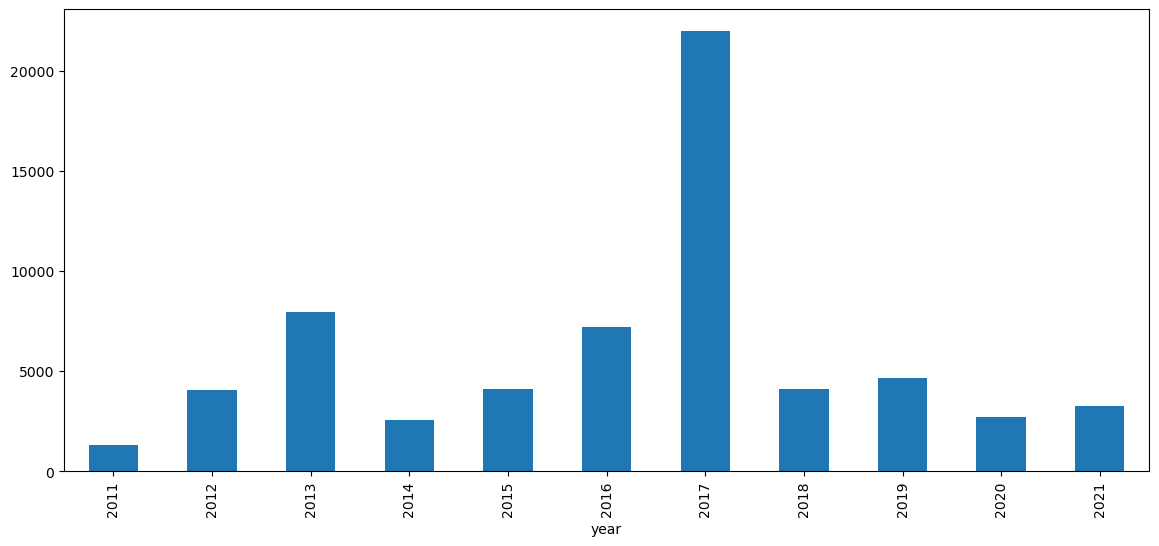

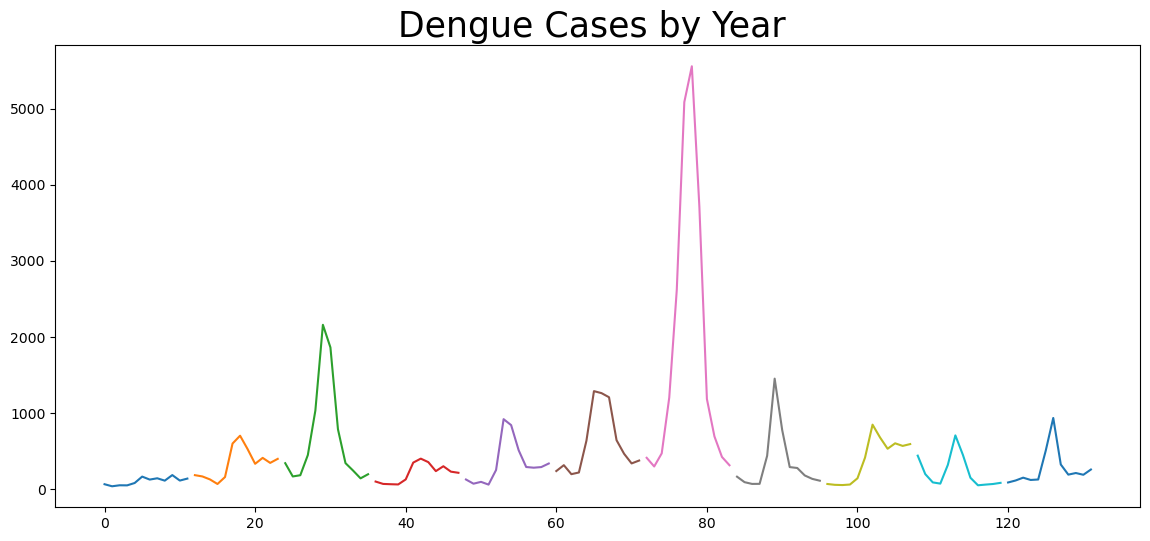

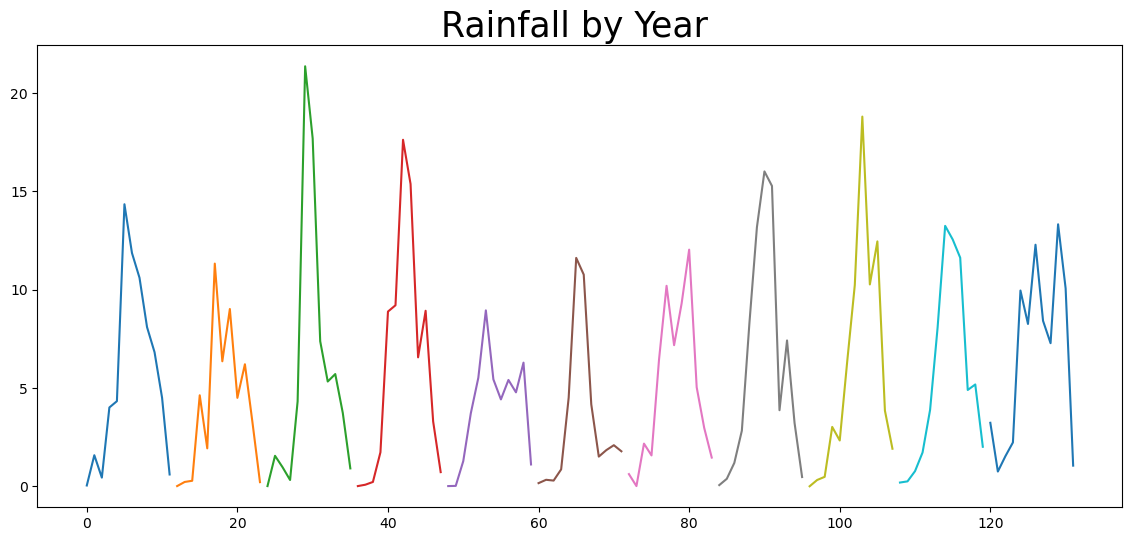

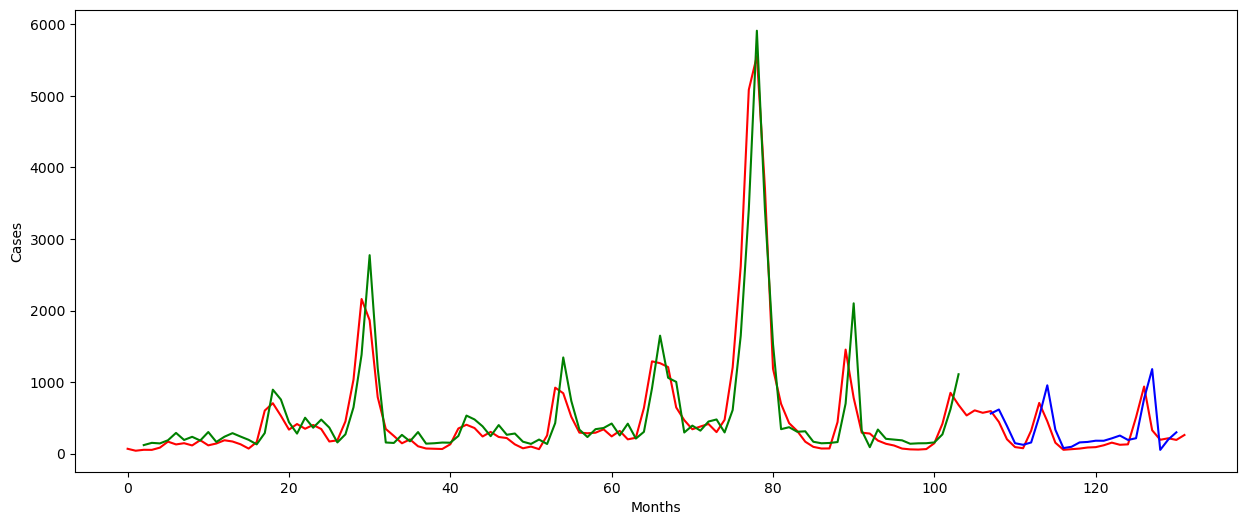

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=2
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


# plot baseline and predictions
plt.figure(figsize = (15,6))
plt.plot(scaler.inverse_transform(df1),'r',label='Original Data')
plt.plot(trainPredictPlot,'g',label='Train Data')
plt.plot(testPredictPlot,'b',label='Test Data')
plt.xlabel('Months')
plt.ylabel('Cases')
plt.show()

The red part of the graph is the input data that we have.

The green part of the graph is the data with which we trained our model. 

The blue part of the graph indicates the predicted output(test data) against the blue part which is the original data.